# Overfitting, Underfitting, and Cross Validation

In [1]:
# set up imports
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
# load the dataset
digits = datasets.load_digits()

In [5]:
# inspect the dataset
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

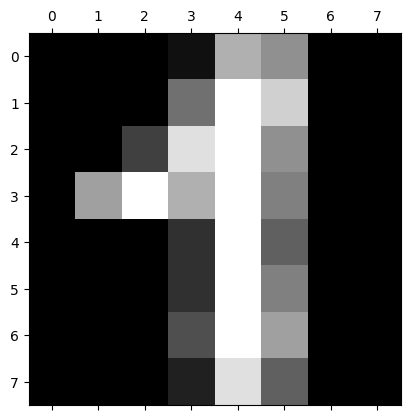

In [9]:
plt.gray()
plt.matshow(digits.images[47])

In [10]:
digits.target[47]

1

In [11]:
len(digits.target)

1797

In [12]:
# prepare the data
X = digits.data
y = digits.target

In [13]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train)

1437

In [14]:
# define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid

{'C': [0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf'],
 'gamma': ['scale', 'auto']}

In [15]:
# create the classifier and perform grid search
svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [16]:
# look at results
print('Best parameter combination:')

grid_search.best_params_

Best parameter combination:


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [17]:
# evaluate test set with best parameters
y_true, y_pred = y_test, grid_search.predict(X_test)

y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [18]:
# print the accuracy of predictions
accuracy = accuracy_score(y_true, y_pred)

accuracy

0.9861111111111112

In [29]:
# inspect the accuracy of other parameter combinations
results = grid_search.cv_results_
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']
param_list = results['params']

for mean_train_score, mean_test_score, params in zip(train_scores, test_scores, param_list):
    print(params)
    print(f'Average Training Score: {mean_train_score:.4}')
    print(f'Average Test Score: {mean_test_score:.4}')

    if mean_train_score > mean_test_score + 0.05:
        print('Possible overfitting')
    elif mean_train_score < 0.75:
        print('Possible underfitting')
    print()

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Average Training Score: 1.0
Average Test Score: 0.9708

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Average Training Score: 0.9602
Average Test Score: 0.9478

{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Average Training Score: 1.0
Average Test Score: 0.9708

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Average Training Score: 0.1072
Average Test Score: 0.1072
Possible underfitting

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Average Training Score: 1.0
Average Test Score: 0.9708

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Average Training Score: 0.996
Average Test Score: 0.9861

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Average Training Score: 1.0
Average Test Score: 0.9708

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Average Training Score: 1.0
Average Test Score: 0.4461
Possible overfitting

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Average Training Score: 1.0
Average Test Score: 0.9708

{'C': 10, 'gamma': 'scale', '